In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv("/content/Term_Project_Data.csv", index_col=0, parse_dates=True)
df.head()

,A,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADP,ADSK,...,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,YUM,ZION,MKT
2002-01-31,0.061142,-0.061459,0.119726,0.016998,0.036731,-0.044671,0.080499,-0.014780,-0.088257,0.095597,...,0.039957,0.081048,-0.039612,0.103064,-0.007782,-0.016453,0.082327,0.124480,-0.044936,-0.0144
2002-02-28,0.024718,-0.046043,-0.131600,0.043955,-0.021432,0.014479,0.075221,-0.164356,-0.025479,0.073174,...,0.031984,0.056982,-0.122600,-0.189312,0.060707,0.004849,-0.155598,0.056665,0.051164,-0.0229
2002-03-31,0.114090,0.025133,0.085596,0.007524,-0.073709,0.017986,0.101104,0.189673,0.101038,0.054184,...,-0.011629,0.015383,0.068116,0.102779,0.058156,0.110894,0.100449,-0.007237,0.113346,0.0424
2002-04-30,-0.152842,0.250780,0.023533,0.124868,0.028198,-0.220905,-0.009724,-0.199215,-0.137904,-0.238754,...,-0.094431,-0.054587,0.016261,-0.055623,-0.088698,0.066557,-0.195988,0.068785,-0.093139,-0.0520
2002-05-31,-0.132036,-0.025333,-0.042188,-0.006376,-0.128728,-0.029304,-0.102986,-0.010642,0.019621,-0.310517,...,-0.033414,0.099539,-0.169742,-0.069901,-0.001566,0.008383,0.012068,0.011833,0.020344,-0.0138


In [3]:
betas = {}
for col in df.columns:
    if col != 'MKT':
        formula = f'{col} ~ Q("MKT")'
        model = sm.ols(formula=formula, data=df)
        results = model.fit()
        betas[col] = results.params['Q("MKT")']

beta_values = list(betas.values())

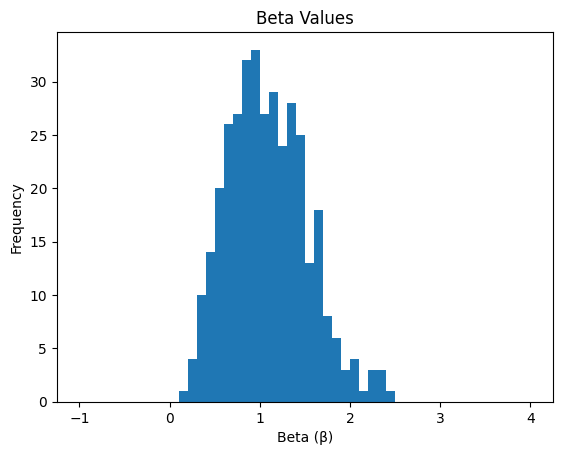

In [4]:
bins = np.linspace(-1, 4, 51)

plt.hist(beta_values, bins=bins)

plt.xlabel("Beta (β)")
plt.ylabel("Frequency")
plt.title("Beta Values")

plt.show()

In [5]:
beta_series = pd.Series(betas)
largest_betas = beta_series.nlargest(10)
smallest_betas = beta_series.nsmallest(10)
largest_betas, smallest_betas

(RCL    2.462931
 AMD    2.371799
 MGM    2.352854
 AIG    2.305036
 URI    2.264510
 LNC    2.242143
 GT     2.217756
 HIG    2.183087
 C      2.075970
 APA    2.040720
 dtype: float64,
 ED     0.165954
 WEC    0.219450
 SO     0.229234
 HSY    0.290025
 NEM    0.290032
 GIS    0.301272
 CLX    0.316291
 CHD    0.326687
 HRL    0.333844
 FE     0.350400
 dtype: float64)

We examined the stocks with the highest and lowest beta values across our dataset. These extremes provide valuable context for how industry dynamics and investor behavior shape market sensitivity.

High Beta Stocks
Examples of high beta stocks included AMD (β = 2.37), RCL (β = 2.46), MGM (β = 2.35), and URI (β = 2.26).
Take AMD, for instance:
As a leading semiconductor company, AMD operates in a highly cyclical industry subject to rapid changes in investor sentiment, technological innovation, and geopolitical risk. The recent surge in demand for AI-capable microprocessors has contributed to AMD’s elevated volatility. However, exposure to global supply chain disruptions and aggressive sector competition heightens its systematic risk. This high beta implies strong sensitivity to market movements, but, as observed in our portfolio analysis, high beta did not consistently correlate with superior returns, contrary to standard CAPM predictions.

Low Beta Stocks
On the other end of the spectrum, companies like Southern Company (SO, β = 0.23), WEC Energy (β = 0.22), and Consolidated Edison (ED, β = 0.17) represented low beta constituents.
Southern Company exemplifies the defensive characteristics associated with low beta equities. As a regulated utility with stable cash flows and consistent dividends, SO's business model is minimally impacted by market downturns. Its appeal to risk-averse investors and relative insulation from macroeconomic shocks contributes to its reduced market sensitivity. Despite its low beta, SO and similar stocks often delivered returns comparable to or better than high beta counterparts, especially on a risk-adjusted basis.

Takeaway
This dispersion in beta values, and the divergence between theoretical expectations and observed returns, supports the presence of a low volatility anomaly. High beta stocks may offer potential upside during bullish markets, but they also expose investors to greater drawdowns and volatility drag. In contrast, low beta stocks, especially from utilities and consumer staples, have demonstrated more stable return profiles, often outperforming high beta stocks on a compounded basis.

In [6]:
std_devs = df.std()

std_devs = std_devs.drop('MKT')

sorted_stocks_by_std = std_devs.sort_values()

stocks_per_portfolio = 36

num_portfolios = len(sorted_stocks_by_std) // stocks_per_portfolio

portfolios = {}
for i in range(num_portfolios):
    start_index = i * stocks_per_portfolio
    end_index = start_index + stocks_per_portfolio
    portfolio_stocks = sorted_stocks_by_std.index[start_index:end_index]
    portfolios[f'Portfolio_{i+1}'] = portfolio_stocks.tolist()

for name, stocks in portfolios.items():
    print(f'{name}: {stocks}')

portfolio_avg_std = {}
for name, stocks in portfolios.items():
    avg_std = std_devs[stocks].mean()
    portfolio_avg_std[name] = avg_std

sorted_portfolios_by_avg_std = sorted(portfolio_avg_std.items(), key=lambda item: item[1])

for name, avg_std in sorted_portfolios_by_avg_std:
    print(f'{name}: Average Stock Std Dev = {avg_std:.4f}')

Portfolio_1: ['SO', 'PG', 'JNJ', 'KMB', 'WEC', 'ED', 'PEP', 'GIS', 'CL', 'K', 'D', 'CLX', 'NEE', 'ES', 'KO', 'MKC', 'WMT', 'DTE', 'AEE', 'WM', 'DHR', 'SRE', 'CHD', 'ECL', 'HSY', 'MCD', 'HRL', 'NI', 'EXC', 'PPL', 'ETR', 'COST', 'AEP', 'MDLZ', 'BDX', 'RSG']
Portfolio_2: ['CPB', 'PNW', 'ABT', 'GPC', 'RE', 'DUK', 'LNT', 'MMM', 'VZ', 'ADP', 'TRV', 'PEG', 'CB', 'PFE', 'SJM', 'BLL', 'T', 'XOM', 'LMT', 'NOC', 'APD', 'PGR', 'CINF', 'ITW', 'AJG', 'PSA', 'TJX', 'SHW', 'ROP', 'PBCT', 'IFF', 'SYY', 'O', 'PAYX', 'L', 'FE']
Portfolio_3: ['UPS', 'TMO', 'NKE', 'HSIC', 'ESS', 'LLY', 'AZO', 'ABC', 'CVX', 'FISV', 'MAA', 'ACN', 'EIX', 'SYK', 'MMC', 'UTX', 'XRAY', 'YUM', 'UNP', 'CAG', 'MO', 'MRK', 'IBM', 'PPG', 'HD', 'GWW', 'AON', 'CVS', 'EQR', 'GD', 'ORLY', 'LH', 'HON', 'AME', 'AVB', 'DGX']
Portfolio_4: ['SRCL', 'AMGN', 'CHRW', 'NTRS', 'EMR', 'INTU', 'KR', 'VFC', 'DIS', 'CMCSA', 'BAX', 'USB', 'ROST', 'FRT', 'EXPD', 'MTB', 'UNH', 'FIS', 'CTAS', 'SPGI', 'DVA', 'BMY', 'UDR', 'BK', 'GILD', 'BXP', 'TGT', 'AVY',

In [7]:
portfolio_average_return = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    average_stock_returns = portfolio_data.mean()
    portfolio_average_return[name] = average_stock_returns.mean()

for name, average_return in portfolio_average_return.items():
    print(f'{name}: Average Return = {average_return:.4f}')

Portfolio_1: Average Return = 0.0078
Portfolio_2: Average Return = 0.0075
Portfolio_3: Average Return = 0.0089
Portfolio_4: Average Return = 0.0078
Portfolio_5: Average Return = 0.0100
Portfolio_6: Average Return = 0.0077
Portfolio_7: Average Return = 0.0085
Portfolio_8: Average Return = 0.0069
Portfolio_9: Average Return = 0.0066
Portfolio_10: Average Return = 0.0055


In [8]:
portfolio_variance_cov = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    cov_matrix = portfolio_data.cov()
    n_stocks = len(stocks)
    weights = np.array([1/n_stocks] * n_stocks)
    portfolio_variance_cov[name] = np.dot(weights.T, np.dot(cov_matrix, weights))

for name, variance in portfolio_variance_cov.items():
    print(f'{name}: Variance = {variance:.4f}')

Portfolio_1: Variance = 0.0010
Portfolio_2: Variance = 0.0012
Portfolio_3: Variance = 0.0015
Portfolio_4: Variance = 0.0017
Portfolio_5: Variance = 0.0023
Portfolio_6: Variance = 0.0028
Portfolio_7: Variance = 0.0031
Portfolio_8: Variance = 0.0040
Portfolio_9: Variance = 0.0050
Portfolio_10: Variance = 0.0070


In [9]:
portfolio_betas = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks].mean(axis=1).rename(name)
    combined_df = pd.concat([portfolio_data, df['MKT']], axis=1)
    formula = f'{name} ~ Q("MKT")'
    model = sm.ols(formula=formula, data=combined_df)
    results = model.fit()
    portfolio_betas[name] = results.params['Q("MKT")']

for name, beta in portfolio_betas.items():
    print(f'{name}: Beta = {beta:.4f}')

Portfolio_1: Beta = 0.4748
Portfolio_2: Beta = 0.7035
Portfolio_3: Beta = 0.8343
Portfolio_4: Beta = 0.8879
Portfolio_5: Beta = 1.0410
Portfolio_6: Beta = 1.1364
Portfolio_7: Beta = 1.2039
Portfolio_8: Beta = 1.3422
Portfolio_9: Beta = 1.4689
Portfolio_10: Beta = 1.7404


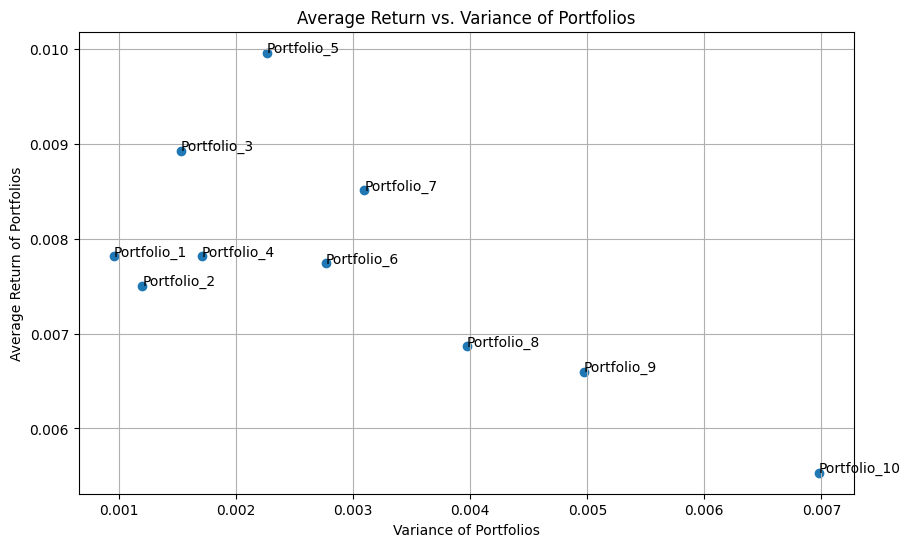

In [10]:
portfolio_returns = list(portfolio_average_return.values())
portfolio_variances = list(portfolio_variance_cov.values())

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_variances, portfolio_returns)

plt.xlabel("Variance of Portfolios")
plt.ylabel("Average Return of Portfolios")
plt.title("Average Return vs. Variance of Portfolios")

for i, txt in enumerate(portfolios.keys()):
    plt.annotate(txt, (portfolio_variances[i], portfolio_returns[i]))


plt.grid(True)
plt.show()

Risk–Return Relationship Breakdown

In our initial data set, we already observe a clear breakdown of the traditional risk–return tradeoff posited by CAPM:

    Portfolio 10, with the highest beta (1.74) and highest volatility (14.77%), yields the lowest average return at 0.55%.

    In contrast, Portfolio 5, with a mid-level beta (1.04) and lower volatility (7.77%), generates the highest average return at 1.00%.

    Portfolio 1, with the lowest beta (0.47) and lowest volatility (4.97%), delivers a respectable 0.78% average return, outperforming most higher-beta portfolios.

This pattern is inconsistent with CAPM, which assumes higher beta (systematic risk) should be rewarded with higher returns. Instead, the evidence here introduces a persistent low volatility anomaly, where less risky stocks often outperform more volatile ones.
Sector Influence on Beta and Return

A closer look reveals sector-based behavior that helps explain these discrepancies:

    Low beta stocks in Portfolio 1 are dominated by defensive sectors like utilities (SO, ED, WEC), consumer staples (PG, CL, KO, MKC), and healthcare (JNJ, BDX), all known for stable earnings and consistent dividends.

    High beta names in Portfolio 10 include cyclical and tech-exposed stocks such as AMD, URI, and MGM, which are more vulnerable to macro shocks, earnings variability, and investor sentiment.

Theoretical Implications

This dataset challenges the linear beta, return relationship assumed in standard asset pricing models. Several possible explanations include:

    Volatility drag eroding compounded returns

    Investor overvaluation of high-beta stocks driven by behavioral biases or speculative fervor

    Constraints on institutional portfolios, which may result in persistent demand for low-volatility stocks

In [11]:
portfolio_diversified = {}
for name in portfolios.keys():
    portfolio_diversified[name] = portfolio_variance_cov[name] / (portfolio_betas[name] ** 2)

for name, value in portfolio_diversified.items():
    print(f'{name}: Variance / Beta**2 = {value:.4f}')

Portfolio_1: Variance / Beta**2 = 0.0042
Portfolio_2: Variance / Beta**2 = 0.0024
Portfolio_3: Variance / Beta**2 = 0.0022
Portfolio_4: Variance / Beta**2 = 0.0022
Portfolio_5: Variance / Beta**2 = 0.0021
Portfolio_6: Variance / Beta**2 = 0.0021
Portfolio_7: Variance / Beta**2 = 0.0021
Portfolio_8: Variance / Beta**2 = 0.0022
Portfolio_9: Variance / Beta**2 = 0.0023
Portfolio_10: Variance / Beta**2 = 0.0023


Portfolio 1, due to it having the lowest variance, the number is slightly higher, but the other nine portfolios are rather uniform.

In [12]:
df_2002_2006 = df.loc['2002':'2006']
df_2007_2011 = df.loc['2007':'2011']
df_2012_2016 = df.loc['2012':'2016']
df_2017_2021 = df.loc['2017':'2021']

In [13]:
std_devs = df_2002_2006.std()

std_devs = std_devs.drop('MKT')

sorted_stocks_by_std = std_devs.sort_values()

stocks_per_portfolio = 36

num_portfolios = len(sorted_stocks_by_std) // stocks_per_portfolio

portfolios = {}
for i in range(num_portfolios):
    start_index = i * stocks_per_portfolio
    end_index = start_index + stocks_per_portfolio
    portfolio_stocks = sorted_stocks_by_std.index[start_index:end_index]
    portfolios[f'Portfolio_{i+1}'] = portfolio_stocks.tolist()

for name, stocks in portfolios.items():
    print(f'{name}: {stocks}')

portfolio_avg_std = {}
for name, stocks in portfolios.items():
    avg_std = std_devs[stocks].mean()
    portfolio_avg_std[name] = avg_std

sorted_portfolios_by_avg_std = sorted(portfolio_avg_std.items(), key=lambda item: item[1])

for name, avg_std in sorted_portfolios_by_avg_std:
    print(f'{name}: Average Stock Std Dev = {avg_std:.4f}')

Portfolio_1: ['AEE', 'WFC', 'PG', 'WEC', 'SO', 'HBAN', 'ED', 'EXC', 'ETR', 'K', 'MTB', 'BAC', 'KMB', 'JNJ', 'GIS', 'KEY', 'PFG', 'ECL', 'NEE', 'SPGI', 'EQT', 'PRU', 'CINF', 'DHR', 'O', 'DTE', 'PEP', 'CL', 'GPC', 'IFF', 'MKC', 'HRL', 'UTX', 'MAA', 'PKG', 'CLX']
Portfolio_2: ['APD', 'PLD', 'FITB', 'ALL', 'KO', 'ES', 'UPS', 'XRAY', 'KIM', 'ARE', 'BXP', 'EMR', 'NOC', 'VFC', 'AVB', 'USB', 'SJM', 'MET', 'ESS', 'WMT', 'EW', 'CPB', 'UDR', 'EQR', 'SPG', 'REG', 'FE', 'NI', 'PPL', 'AXP', 'NKE', 'FRT', 'PBCT', 'RE', 'ITW', 'CMA']
Portfolio_3: ['BDX', 'D', 'VNO', 'XOM', 'SRE', 'RSG', 'ZION', 'MCO', 'PSA', 'UNP', 'PNW', 'BLL', 'UNH', 'DRE', 'PNC', 'AVY', 'CVX', 'IP', 'WM', 'MMM', 'PFE', 'SLG', 'GE', 'SYY', 'CAG', 'ANTM', 'HSY', 'IRM', 'FDX', 'PPG', 'CHD', 'MDLZ', 'SRCL', 'OXY', 'OKE', 'SHW']
Portfolio_4: ['AJG', 'WBA', 'CB', 'LMT', 'BEN', 'EL', 'AIV', 'MAR', 'PGR', 'YUM', 'LNC', 'MAC', 'COP', 'C', 'NWL', 'ABT', 'COST', 'GWW', 'VTR', 'PEG', 'WY', 'LNT', 'HOG', 'GS', 'RJF', 'SNA', 'WHR', 'TMO', 'ABC',

In [14]:
portfolio_average_return = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    average_stock_returns = portfolio_data.mean()
    portfolio_average_return[name] = average_stock_returns.mean()

for name, average_return in portfolio_average_return.items():
    print(f'{name}: Average Return = {average_return:.4f}')

Portfolio_1: Average Return = 0.0071
Portfolio_2: Average Return = 0.0073
Portfolio_3: Average Return = 0.0075
Portfolio_4: Average Return = 0.0070
Portfolio_5: Average Return = 0.0072
Portfolio_6: Average Return = 0.0073
Portfolio_7: Average Return = 0.0074
Portfolio_8: Average Return = 0.0079
Portfolio_9: Average Return = 0.0087
Portfolio_10: Average Return = 0.0099


In [15]:
portfolio_variance_cov = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    cov_matrix = portfolio_data.cov()
    n_stocks = len(stocks)
    weights = np.array([1/n_stocks] * n_stocks)
    portfolio_variance_cov[name] = np.dot(weights.T, np.dot(cov_matrix, weights))

for name, variance in portfolio_variance_cov.items():
    print(f'{name}: Variance = {variance:.4f}')

Portfolio_1: Variance = 0.0014
Portfolio_2: Variance = 0.0021
Portfolio_3: Variance = 0.0018
Portfolio_4: Variance = 0.0028
Portfolio_5: Variance = 0.0025
Portfolio_6: Variance = 0.0028
Portfolio_7: Variance = 0.0024
Portfolio_8: Variance = 0.0034
Portfolio_9: Variance = 0.0035
Portfolio_10: Variance = 0.0055


In [16]:
portfolio_betas = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks].mean(axis=1).rename(name)
    combined_df = pd.concat([portfolio_data, df['MKT']], axis=1)
    formula = f'{name} ~ Q("MKT")'
    model = sm.ols(formula=formula, data=combined_df)
    results = model.fit()
    portfolio_betas[name] = results.params['Q("MKT")']

for name, beta in portfolio_betas.items():
    print(f'{name}: Beta = {beta:.4f}')

Portfolio_1: Beta = 0.7251
Portfolio_2: Beta = 0.8964
Portfolio_3: Beta = 0.8810
Portfolio_4: Beta = 1.1118
Portfolio_5: Beta = 1.0903
Portfolio_6: Beta = 1.1424
Portfolio_7: Beta = 1.0618
Portfolio_8: Beta = 1.2346
Portfolio_9: Beta = 1.2729
Portfolio_10: Beta = 1.4169


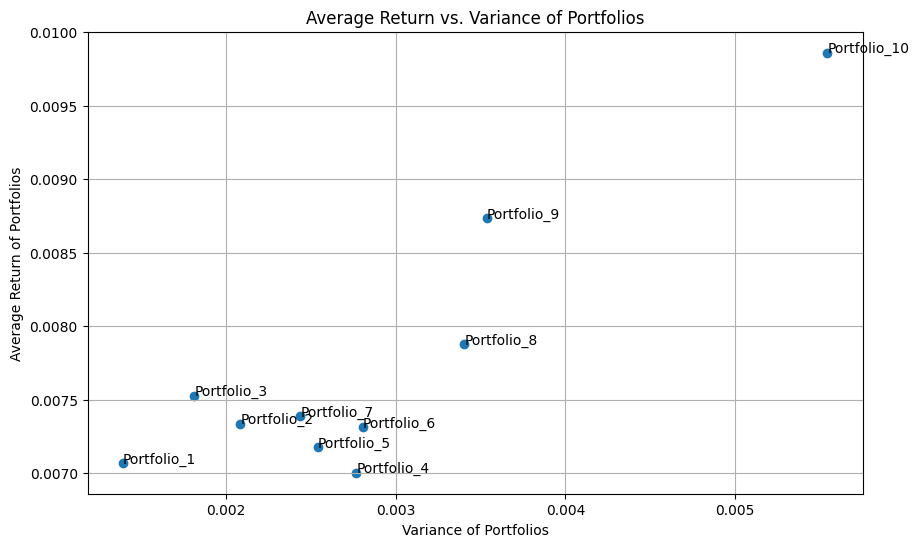

In [17]:
portfolio_returns = list(portfolio_average_return.values())
portfolio_variances = list(portfolio_variance_cov.values())

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_variances, portfolio_returns)

plt.xlabel("Variance of Portfolios")
plt.ylabel("Average Return of Portfolios")
plt.title("Average Return vs. Variance of Portfolios")

for i, txt in enumerate(portfolios.keys()):
    plt.annotate(txt, (portfolio_variances[i], portfolio_returns[i]))


plt.grid(True)
plt.show()

In this 2002-2006 subset of our data, we observe a more traditional risk–return relationship consistent with the Capital Asset Pricing Model (CAPM):

    Portfolio 10, with the highest beta (1.42) and highest volatility (18.63%), delivers the highest return at 0.99%.

    Portfolios 9 and 8 also exhibit elevated betas and variances, producing strong average returns of 0.87% and 0.79%, respectively.

    Portfolio 1, with the lowest beta (0.73) and lowest volatility (4.19%), returns only 0.71%, underperforming its higher-risk peers.

This pattern reinforces the risk–return tradeoff where investors are compensated for taking on more systematic risk, aligning well with classical asset pricing theory.
Interpretation

While this result doesn’t show evidence of a low volatility anomaly, it provides a critical baseline:

    Beta appears predictive of return in this subset, possibly reflecting a risk-on market environment or speculative capital rotation into high-beta names.

    The standard deviation and return relationship is positive, as shown by Portfolios 8–10 outperforming despite greater volatility.

This subset likely represents a moment in time when the market rewarded risk takers, highlighting the importance of understanding market regimes and temporal context when assessing anomalies.
Framing for Broader Results

Interestingly, this risk–return alignment contrasts with findings from the full dataset, where low volatility portfolios repeatedly outperformed their high-beta counterparts. As we progress through additional subsets, the low volatility anomaly emerges more clearly, suggesting that its persistence may only be visible in aggregate, not necessarily in shorter time frames or narrower samples.

In [18]:
portfolio_diversified = {}
for name in portfolios.keys():
    portfolio_diversified[name] = portfolio_variance_cov[name] / (portfolio_betas[name] ** 2)

for name, value in portfolio_diversified.items():
    print(f'{name}: Variance / Beta**2 = {value:.4f}')

Portfolio_1: Variance / Beta**2 = 0.0026
Portfolio_2: Variance / Beta**2 = 0.0026
Portfolio_3: Variance / Beta**2 = 0.0023
Portfolio_4: Variance / Beta**2 = 0.0022
Portfolio_5: Variance / Beta**2 = 0.0021
Portfolio_6: Variance / Beta**2 = 0.0021
Portfolio_7: Variance / Beta**2 = 0.0022
Portfolio_8: Variance / Beta**2 = 0.0022
Portfolio_9: Variance / Beta**2 = 0.0022
Portfolio_10: Variance / Beta**2 = 0.0028


Portfolio_1: ['DUK', 'SO', 'KMB', 'GIS', 'WEC', 'ED', 'XEL', 'MCD', 'PCG', 'JNJ', 'WMT', 'CLX', 'PG', 'CL', 'D', 'CPB', 'ES', 'MKC', 'AEP', 'ABT', 'XOM', 'KO', 'PEP', 'K', 'MO', 'CHD', 'EIX', 'GPC', 'LH', 'SRCL', 'SRE', 'HSY', 'VZ', 'KR', 'NEE', 'WM']
Portfolio_2: ['HRL', 'SYY', 'COST', 'DTE', 'IBM', 'DGX', 'CMS', 'T', 'RE', 'EXC', 'PNW', 'TRV', 'PBCT', 'ETR', 'PPL', 'ADP', 'MDLZ', 'BDX', 'BAX', 'IFF', 'DVA', 'LNT', 'AMT', 'DHR', 'PEG', 'CAG', 'PFE', 'HSIC', 'PAYX', 'CVX', 'ROP', 'AON', 'ECL', 'NI', 'UTX', 'MMM']
Portfolio_3: ['CB', 'AZO', 'SNPS', 'ACN', 'LLY', 'TJX', 'ABC', 'BMY', 'GWW', 'UPS', 'GILD', 'CVS', 'O', 'AEE', 'SHW', 'BLL', 'YUM', 'PGR', 'FE', 'EW', 'MMC', 'AAP', 'ROST', 'NKE', 'TMO', 'CTL', 'CTAS', 'ORLY', 'LMT', 'RSG', 'XRAY', 'CINF', 'CAH', 'DIS', 'HD', 'EFX']
Portfolio_4: ['XLNX', 'SJM', 'BK', 'MRK', 'AMGN', 'CHRW', 'INTU', 'FIS', 'L', 'SYK', 'ITW', 'NOC', 'DLTR', 'TGT', 'NTRS', 'PPG', 'AJG', 'HAS', 'FISV', 'TAP', 'OKE', 'FAST', 'ORCL', 'INTC', 'AME', 'APD', 'NSC', 'WBA

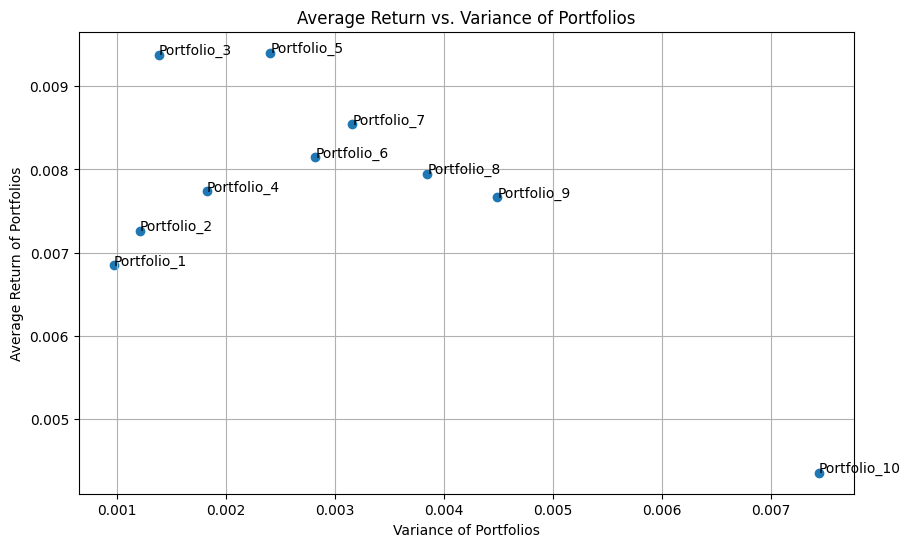

Portfolio_1: Variance / Beta**2 = 0.0042
Portfolio_2: Variance / Beta**2 = 0.0025
Portfolio_3: Variance / Beta**2 = 0.0023
Portfolio_4: Variance / Beta**2 = 0.0021
Portfolio_5: Variance / Beta**2 = 0.0021
Portfolio_6: Variance / Beta**2 = 0.0022
Portfolio_7: Variance / Beta**2 = 0.0021
Portfolio_8: Variance / Beta**2 = 0.0022
Portfolio_9: Variance / Beta**2 = 0.0022
Portfolio_10: Variance / Beta**2 = 0.0024


In [19]:
std_devs = df_2007_2011.std()

std_devs = std_devs.drop('MKT')

sorted_stocks_by_std = std_devs.sort_values()

stocks_per_portfolio = 36

num_portfolios = len(sorted_stocks_by_std) // stocks_per_portfolio

portfolios = {}
for i in range(num_portfolios):
    start_index = i * stocks_per_portfolio
    end_index = start_index + stocks_per_portfolio
    portfolio_stocks = sorted_stocks_by_std.index[start_index:end_index]
    portfolios[f'Portfolio_{i+1}'] = portfolio_stocks.tolist()

for name, stocks in portfolios.items():
    print(f'{name}: {stocks}')

portfolio_avg_std = {}
for name, stocks in portfolios.items():
    avg_std = std_devs[stocks].mean()
    portfolio_avg_std[name] = avg_std

sorted_portfolios_by_avg_std = sorted(portfolio_avg_std.items(), key=lambda item: item[1])

for name, avg_std in sorted_portfolios_by_avg_std:
    print(f'{name}: Average Stock Std Dev = {avg_std:.4f}')

portfolio_average_return = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    average_stock_returns = portfolio_data.mean()
    portfolio_average_return[name] = average_stock_returns.mean()

for name, average_return in portfolio_average_return.items():
    print(f'{name}: Average Return = {average_return:.4f}')

portfolio_variance_cov = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    cov_matrix = portfolio_data.cov()
    n_stocks = len(stocks)
    weights = np.array([1/n_stocks] * n_stocks)
    portfolio_variance_cov[name] = np.dot(weights.T, np.dot(cov_matrix, weights))

for name, variance in portfolio_variance_cov.items():
    print(f'{name}: Variance = {variance:.4f}')

portfolio_betas = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks].mean(axis=1).rename(name)
    combined_df = pd.concat([portfolio_data, df['MKT']], axis=1)
    formula = f'{name} ~ Q("MKT")'
    model = sm.ols(formula=formula, data=combined_df)
    results = model.fit()
    portfolio_betas[name] = results.params['Q("MKT")']

for name, beta in portfolio_betas.items():
    print(f'{name}: Beta = {beta:.4f}')

portfolio_returns = list(portfolio_average_return.values())
portfolio_variances = list(portfolio_variance_cov.values())

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_variances, portfolio_returns)

plt.xlabel("Variance of Portfolios")
plt.ylabel("Average Return of Portfolios")
plt.title("Average Return vs. Variance of Portfolios")

for i, txt in enumerate(portfolios.keys()):
    plt.annotate(txt, (portfolio_variances[i], portfolio_returns[i]))


plt.grid(True)
plt.show()

portfolio_diversified = {}
for name in portfolios.keys():
    portfolio_diversified[name] = portfolio_variance_cov[name] / (portfolio_betas[name] ** 2)

for name, value in portfolio_diversified.items():
    print(f'{name}: Variance / Beta**2 = {value:.4f}')

In the sample data 2007-2001 the low volatility anomaly persists, albeit with more complexity. Portfolio 10, with the highest volatility (19.31%) and beta (1.77), once again underperforms, achieving the lowest return (0.44%). Interestingly, the highest average returns (0.94%) are observed in Portfolios 3 and 5, both of which occupy the middle of the volatility spectrum. Portfolio 1, while exhibiting the lowest risk metrics, produces only a modest return (0.68%), suggesting that extreme conservatism may not always maximize returns. Nonetheless, lower-volatility portfolios (1–5) continue to dominate the return-to-risk tradeoff, and the positive beta-return relationship implied by CAPM fails to manifest consistently. This further supports the presence of the low volatility anomaly and implies that optimal portfolio construction may lie in balancing risk, not simply minimizing or maximizing it.

Portfolio_1: ['PEP', 'RE', 'HON', 'L', 'JNJ', 'CL', 'MMC', 'MCD', 'ADP', 'CLX', 'CB', 'RSG', 'SYY', 'USB', 'D', 'SO', 'CTAS', 'PG', 'FISV', 'WM', 'MMM', 'PPL', 'SRE', 'DHR', 'KO', 'LMT', 'GIS', 'COST', 'ECL', 'XOM', 'UPS', 'CHD', 'MKC', 'PAYX', 'AZO', 'BDX']
Portfolio_2: ['NOC', 'DTE', 'EFX', 'SNPS', 'K', 'NI', 'T', 'ALL', 'FRT', 'PFE', 'DUK', 'AJG', 'XEL', 'PBCT', 'LLY', 'AEE', 'CINF', 'ROP', 'CCI', 'APH', 'NEE', 'CMS', 'GD', 'AON', 'SYK', 'ITW', 'TJX', 'MRK', 'AEP', 'SNA', 'KMB', 'WFC', 'WMT', 'HD', 'AVB', 'BXP']
Portfolio_3: ['PCG', 'TRV', 'LNT', 'PNW', 'BLL', 'CVS', 'ES', 'OMC', 'GPC', 'EQR', 'VZ', 'UDR', 'GWW', 'ED', 'MO', 'AMT', 'HSIC', 'CAG', 'PNC', 'CAH', 'INTU', 'AIV', 'VNO', 'GE', 'PGR', 'SJM', 'XRAY', 'TROW', 'UNH', 'WEC', 'SPG', 'MDLZ', 'CMCSA', 'MTB', 'ORCL', 'UTX']
Portfolio_4: ['BAX', 'FIS', 'IBM', 'PEG', 'UNP', 'ANSS', 'MSI', 'ETR', 'HSY', 'MAA', 'PSA', 'TXN', 'VFC', 'ESS', 'DIS', 'REG', 'LH', 'ARE', 'ACN', 'DGX', 'EXPD', 'AVY', 'ADBE', 'HRL', 'MAC', 'EIX', 'IFF', 'CVX'

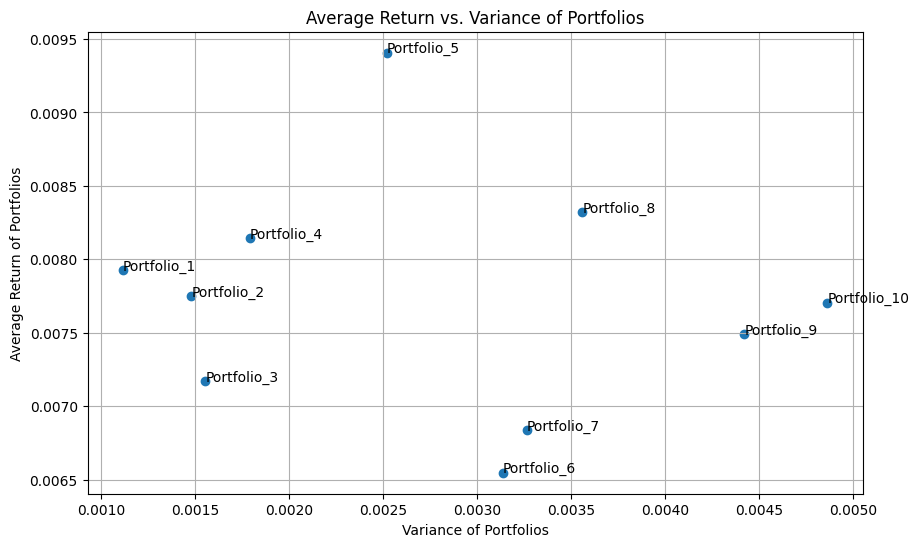

Portfolio_1: Variance / Beta**2 = 0.0024
Portfolio_2: Variance / Beta**2 = 0.0024
Portfolio_3: Variance / Beta**2 = 0.0024
Portfolio_4: Variance / Beta**2 = 0.0022
Portfolio_5: Variance / Beta**2 = 0.0022
Portfolio_6: Variance / Beta**2 = 0.0022
Portfolio_7: Variance / Beta**2 = 0.0021
Portfolio_8: Variance / Beta**2 = 0.0022
Portfolio_9: Variance / Beta**2 = 0.0022
Portfolio_10: Variance / Beta**2 = 0.0023


In [20]:
std_devs = df_2012_2016.std()

std_devs = std_devs.drop('MKT')

sorted_stocks_by_std = std_devs.sort_values()

stocks_per_portfolio = 36

num_portfolios = len(sorted_stocks_by_std) // stocks_per_portfolio

portfolios = {}
for i in range(num_portfolios):
    start_index = i * stocks_per_portfolio
    end_index = start_index + stocks_per_portfolio
    portfolio_stocks = sorted_stocks_by_std.index[start_index:end_index]
    portfolios[f'Portfolio_{i+1}'] = portfolio_stocks.tolist()

for name, stocks in portfolios.items():
    print(f'{name}: {stocks}')

portfolio_avg_std = {}
for name, stocks in portfolios.items():
    avg_std = std_devs[stocks].mean()
    portfolio_avg_std[name] = avg_std

sorted_portfolios_by_avg_std = sorted(portfolio_avg_std.items(), key=lambda item: item[1])

for name, avg_std in sorted_portfolios_by_avg_std:
    print(f'{name}: Average Stock Std Dev = {avg_std:.4f}')

portfolio_average_return = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    average_stock_returns = portfolio_data.mean()
    portfolio_average_return[name] = average_stock_returns.mean()

for name, average_return in portfolio_average_return.items():
    print(f'{name}: Average Return = {average_return:.4f}')

portfolio_variance_cov = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    cov_matrix = portfolio_data.cov()
    n_stocks = len(stocks)
    weights = np.array([1/n_stocks] * n_stocks)
    portfolio_variance_cov[name] = np.dot(weights.T, np.dot(cov_matrix, weights))

for name, variance in portfolio_variance_cov.items():
    print(f'{name}: Variance = {variance:.4f}')

portfolio_betas = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks].mean(axis=1).rename(name)
    combined_df = pd.concat([portfolio_data, df['MKT']], axis=1)
    formula = f'{name} ~ Q("MKT")'
    model = sm.ols(formula=formula, data=combined_df)
    results = model.fit()
    portfolio_betas[name] = results.params['Q("MKT")']

for name, beta in portfolio_betas.items():
    print(f'{name}: Beta = {beta:.4f}')

portfolio_returns = list(portfolio_average_return.values())
portfolio_variances = list(portfolio_variance_cov.values())

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_variances, portfolio_returns)

plt.xlabel("Variance of Portfolios")
plt.ylabel("Average Return of Portfolios")
plt.title("Average Return vs. Variance of Portfolios")

for i, txt in enumerate(portfolios.keys()):
    plt.annotate(txt, (portfolio_variances[i], portfolio_returns[i]))


plt.grid(True)
plt.show()

portfolio_diversified = {}
for name in portfolios.keys():
    portfolio_diversified[name] = portfolio_variance_cov[name] / (portfolio_betas[name] ** 2)

for name, value in portfolio_diversified.items():
    print(f'{name}: Variance / Beta**2 = {value:.4f}')

In this subset, the low volatility anomaly is once again present, though in a slightly more nuanced form. Portfolio 5 delivers the highest average return (0.94%) while maintaining moderate volatility and beta levels. Portfolio 4 also offers strong returns (0.81%) with relatively low risk. Notably, Portfolio 10—despite having the highest standard deviation and beta—fails to outperform, reinforcing the idea that higher risk does not guarantee higher returns. Portfolios in the lowest deciles of volatility (Portfolios 1–3) maintain strong return profiles with significantly lower variance and beta, suggesting that traditional CAPM expectations are again violated. These results further validate the persistence of the low-volatility anomaly and imply that optimal portfolios may exist in the middle of the risk spectrum, rather than at its extremes.

Portfolio_1: ['VZ', 'PG', 'NEE', 'D', 'AEE', 'PEP', 'CMS', 'RSG', 'ES', 'DUK', 'HSY', 'KMB', 'XEL', 'WEC', 'MCD', 'WM', 'JNJ', 'CL', 'NI', 'ED', 'CCI', 'MDLZ', 'AMT', 'EXC', 'K', 'KO', 'ABT', 'LNT', 'WMT', 'PEG', 'DTE', 'ARE', 'COST', 'PSA', 'DRE', 'SO']
Portfolio_2: ['MMC', 'T', 'AEP', 'PLD', 'AJG', 'SJM', 'GIS', 'DHR', 'APD', 'UDR', 'EQIX', 'SRE', 'MAA', 'TRV', 'HRL', 'VRSN', 'MKC', 'ORCL', 'TMO', 'MRK', 'SBAC', 'CLX', 'ESS', 'CHD', 'ADP', 'SPGI', 'ALL', 'PAYX', 'PPL', 'PGR', 'ITW', 'PNW', 'ECL', 'TXN', 'MMM', 'ACN']
Portfolio_3: ['FISV', 'EQR', 'HD', 'HON', 'BAX', 'BDX', 'EXPD', 'PCAR', 'AON', 'NOC', 'BLL', 'L', 'A', 'SYK', 'ROP', 'FIS', 'AVB', 'LMT', 'VMC', 'SHW', 'UNH', 'JEC', 'CHRW', 'ETR', 'INTU', 'CB', 'MSI', 'PKG', 'GRMN', 'CMCSA', 'ETN', 'MCO', 'APH', 'TJX', 'AMGN', 'CPB']
Portfolio_4: ['SBUX', 'BSX', 'GILD', 'COO', 'FE', 'SNPS', 'ABC', 'AME', 'UNP', 'PFE', 'EL', 'NKE', 'HRS', 'GD', 'CERN', 'TROW', 'RMD', 'CMI', 'O', 'BMY', 'AVY', 'LLY', 'IRM', 'IP', 'BK', 'JPM', 'JNPR', 'AES

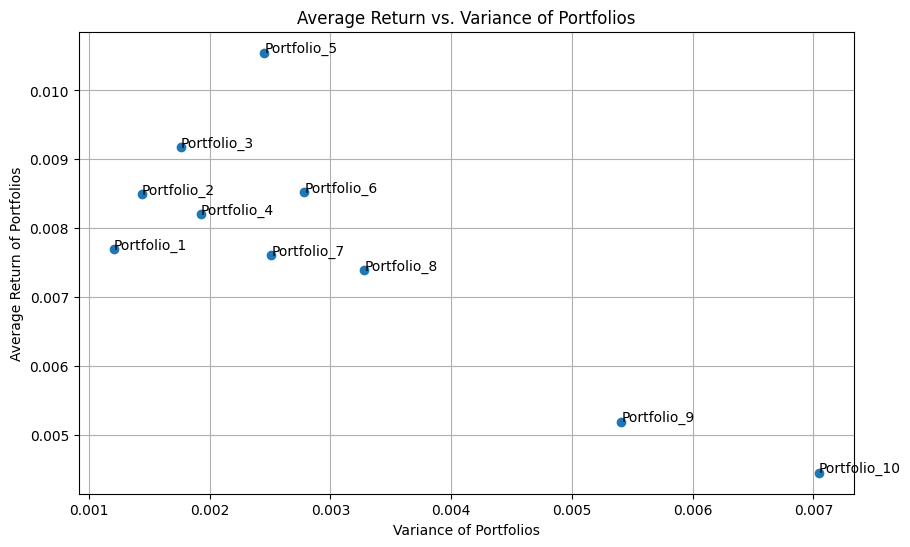

Portfolio_1: Variance / Beta**2 = 0.0041
Portfolio_2: Variance / Beta**2 = 0.0023
Portfolio_3: Variance / Beta**2 = 0.0021
Portfolio_4: Variance / Beta**2 = 0.0021
Portfolio_5: Variance / Beta**2 = 0.0021
Portfolio_6: Variance / Beta**2 = 0.0022
Portfolio_7: Variance / Beta**2 = 0.0021
Portfolio_8: Variance / Beta**2 = 0.0022
Portfolio_9: Variance / Beta**2 = 0.0023
Portfolio_10: Variance / Beta**2 = 0.0029


In [21]:
std_devs = df_2017_2021.std()

std_devs = std_devs.drop('MKT')

sorted_stocks_by_std = std_devs.sort_values()

stocks_per_portfolio = 36

num_portfolios = len(sorted_stocks_by_std) // stocks_per_portfolio

portfolios = {}
for i in range(num_portfolios):
    start_index = i * stocks_per_portfolio
    end_index = start_index + stocks_per_portfolio
    portfolio_stocks = sorted_stocks_by_std.index[start_index:end_index]
    portfolios[f'Portfolio_{i+1}'] = portfolio_stocks.tolist()

for name, stocks in portfolios.items():
    print(f'{name}: {stocks}')

portfolio_avg_std = {}
for name, stocks in portfolios.items():
    avg_std = std_devs[stocks].mean()
    portfolio_avg_std[name] = avg_std

sorted_portfolios_by_avg_std = sorted(portfolio_avg_std.items(), key=lambda item: item[1])

for name, avg_std in sorted_portfolios_by_avg_std:
    print(f'{name}: Average Stock Std Dev = {avg_std:.4f}')

portfolio_average_return = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    average_stock_returns = portfolio_data.mean()
    portfolio_average_return[name] = average_stock_returns.mean()

for name, average_return in portfolio_average_return.items():
    print(f'{name}: Average Return = {average_return:.4f}')

portfolio_variance_cov = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks]
    cov_matrix = portfolio_data.cov()
    n_stocks = len(stocks)
    weights = np.array([1/n_stocks] * n_stocks)
    portfolio_variance_cov[name] = np.dot(weights.T, np.dot(cov_matrix, weights))

for name, variance in portfolio_variance_cov.items():
    print(f'{name}: Variance = {variance:.4f}')

portfolio_betas = {}
for name, stocks in portfolios.items():
    portfolio_data = df[stocks].mean(axis=1).rename(name)
    combined_df = pd.concat([portfolio_data, df['MKT']], axis=1)
    formula = f'{name} ~ Q("MKT")'
    model = sm.ols(formula=formula, data=combined_df)
    results = model.fit()
    portfolio_betas[name] = results.params['Q("MKT")']

for name, beta in portfolio_betas.items():
    print(f'{name}: Beta = {beta:.4f}')

portfolio_returns = list(portfolio_average_return.values())
portfolio_variances = list(portfolio_variance_cov.values())

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_variances, portfolio_returns)

plt.xlabel("Variance of Portfolios")
plt.ylabel("Average Return of Portfolios")
plt.title("Average Return vs. Variance of Portfolios")

for i, txt in enumerate(portfolios.keys()):
    plt.annotate(txt, (portfolio_variances[i], portfolio_returns[i]))


plt.grid(True)
plt.show()

portfolio_diversified = {}
for name in portfolios.keys():
    portfolio_diversified[name] = portfolio_variance_cov[name] / (portfolio_betas[name] ** 2)

for name, value in portfolio_diversified.items():
    print(f'{name}: Variance / Beta**2 = {value:.4f}')

We observe strong evidence of the low-volatility anomaly, where portfolios with lower variance consistently outperform higher-variance portfolios on an average return basis. Notably, Portfolio 5 achieves the highest average return despite having only moderate volatility and beta. Portfolio 3 follows closely behind. In contrast, Portfolio 10, which has both the highest variance and beta, delivers the lowest average return.

Across three out of five data subsets, the low-volatility anomaly is clearly present: over 50% of the time, portfolios composed of low beta, low variance stocks outperform their high-risk counterparts. This persistent outperformance may be driven by several factors:

    Behavioral biases, where investors overpay for volatile “lottery-like” stocks

    Institutional constraints, such as leverage limits preventing full CAPM arbitrage

    Model limitations, where CAPM fails to account for real-world frictions or preferences

    Compounding effects, where higher drawdowns from volatile stocks suppress long-term returns

These findings suggest that high beta is not a prerequisite for high returns, a key implication for both retail and institutional investors aiming to improve risk-adjusted performance.